In [93]:

print(data.head())


          dt  AverageTemperature  AverageTemperatureUncertainty Country  year
0 1743-11-01               4.384                          2.294   Åland  1743
5 1744-04-01               1.530                          4.680   Åland  1744
6 1744-05-01               6.702                          1.789   Åland  1744
7 1744-06-01              11.609                          1.577   Åland  1744
8 1744-07-01              15.342                          1.410   Åland  1744


In [94]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 544811 entries, 0 to 577460
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             544811 non-null  datetime64[ns]
 1   AverageTemperature             544811 non-null  float64       
 2   AverageTemperatureUncertainty  544811 non-null  float64       
 3   Country                        544811 non-null  object        
 4   year                           544811 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), object(1)
memory usage: 22.9+ MB
None


In [95]:
print(data.describe())

                                  dt  AverageTemperature  \
count                         544811       544811.000000   
mean   1913-08-08 18:20:24.887162624           17.193354   
min              1743-11-01 00:00:00          -37.658000   
25%              1869-11-01 00:00:00           10.025000   
50%              1919-08-01 00:00:00           20.901000   
75%              1966-10-01 00:00:00           25.814000   
max              2013-09-01 00:00:00           38.842000   
std                              NaN           10.953966   

       AverageTemperatureUncertainty           year  
count                  544811.000000  544811.000000  
mean                        1.019190    1913.145696  
min                         0.052000    1743.000000  
25%                         0.323000    1869.000000  
50%                         0.571000    1919.000000  
75%                         1.207000    1966.000000  
max                        15.003000    2013.000000  
std                        

In [96]:
data.dropna(inplace=True)

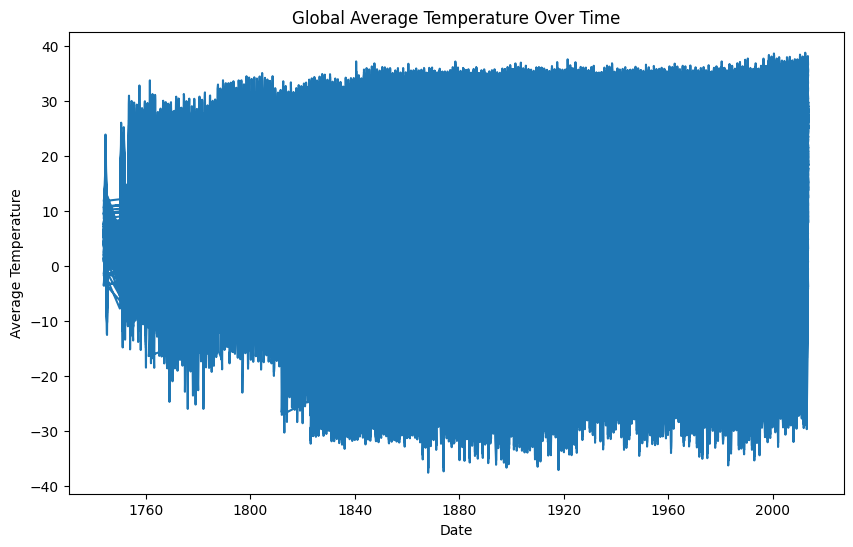

In [97]:
plt.figure(figsize=(10, 6))
plt.plot(data['dt'], data['AverageTemperature'])
plt.title('Global Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.show()

In [98]:
data['dt'] = pd.to_datetime(data['dt'])
# Extract year from date
data['year'] = data['dt'].dt.year
# Group by year and calculate mean temperature
global_data = data.groupby('year')['AverageTemperature'].mean().reset_index()

In [99]:
train_data, test_data = train_test_split(global_data, test_size=0.2, shuffle=False)



In [100]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data['AverageTemperature'].values.reshape(-1, 1))
test_scaled = scaler.transform(test_data['AverageTemperature'].values.reshape(-1, 1))

In [101]:
def create_dataset(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

In [102]:
time_steps = 10
X_train, y_train = create_dataset(train_scaled, time_steps)
X_test, y_test = create_dataset(test_scaled, time_steps)

In [103]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [104]:

data['dt'] = pd.to_datetime(data['dt'])

data['year'] = data['dt'].dt.year

global_data = data.groupby('year')['AverageTemperature'].mean().reset_index()





In [105]:
train_data, test_data = train_test_split(global_data, test_size=0.2, shuffle=False)



In [106]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data['AverageTemperature'].values.reshape(-1, 1))
test_scaled = scaler.transform(test_data['AverageTemperature'].values.reshape(-1, 1))




In [107]:
time_steps = 12
X_train, y_train = create_dataset(train_scaled, time_steps)
X_test, y_test = create_dataset(test_scaled, time_steps)




In [108]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))




In [109]:
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')



In [110]:
history = model.fit(X_train, y_train, epochs=300, batch_size=64, verbose=1)

Epoch 1/300
4/4 [==============================] - 6s 37ms/step - loss: 0.4761
Epoch 2/300
4/4 [==============================] - 0s 38ms/step - loss: 0.0520
Epoch 3/300
4/4 [==============================] - 0s 47ms/step - loss: 0.0684
Epoch 4/300
4/4 [==============================] - 0s 41ms/step - loss: 0.0121
Epoch 5/300
4/4 [==============================] - 0s 37ms/step - loss: 0.0327
Epoch 6/300
4/4 [==============================] - 0s 41ms/step - loss: 0.0172
Epoch 7/300
4/4 [==============================] - 0s 41ms/step - loss: 0.0100
Epoch 8/300
4/4 [==============================] - 0s 37ms/step - loss: 0.0134
Epoch 9/300
4/4 [==============================] - 0s 43ms/step - loss: 0.0073
Epoch 10/300
4/4 [==============================] - 0s 37ms/step - loss: 0.0089
Epoch 11/300
4/4 [==============================] - 0s 39ms/step - loss: 0.0072
Epoch 12/300
4/4 [==============================] - 0s 38ms/step - loss: 0.0065
Epoch 13/300
4/4 [==============================]

In [111]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Squared Error (RMSE) for Global Temperature Prediction:', rmse)

Root Mean Squared Error (RMSE) for Global Temperature Prediction: 0.01198444284765831


In [112]:
predictions = model.predict(X_test)
print(predictions)

actual_predictions = scaler.inverse_transform(predictions)
print(actual_predictions)


2/2 [==============================] - 3s 14ms/step
[[0.9706466 ]
 [0.9705184 ]
 [0.97131985]
 [0.9714887 ]
 [0.9717313 ]
 [0.9706225 ]
 [0.970989  ]
 [0.9715069 ]
 [0.9729502 ]
 [0.9745713 ]
 [0.97637415]
 [0.977702  ]
 [0.9797855 ]
 [0.9804928 ]
 [0.9797044 ]
 [0.97853416]
 [0.9787398 ]
 [0.980382  ]
 [0.98253363]
 [0.98601466]
 [0.9883417 ]
 [0.9891837 ]
 [0.98865825]
 [0.98906034]
 [0.9903869 ]
 [0.9906109 ]
 [0.99146897]
 [0.9945931 ]
 [0.99791706]
 [1.0005635 ]
 [1.0027039 ]
 [1.0050046 ]
 [1.0070221 ]
 [1.0080981 ]
 [1.0088173 ]
 [1.0095001 ]
 [1.0105293 ]
 [1.0107503 ]
 [1.010993  ]
 [1.0117073 ]
 [1.0117877 ]
 [1.0114408 ]]
[[18.522787]
 [18.520523]
 [18.534672]
 [18.537653]
 [18.541937]
 [18.52236 ]
 [18.528831]
 [18.537973]
 [18.563456]
 [18.592072]
 [18.623901]
 [18.647343]
 [18.684122]
 [18.69661 ]
 [18.682692]
 [18.662031]
 [18.665663]
 [18.694654]
 [18.732637]
 [18.794092]
 [18.835175]
 [18.850039]
 [18.840761]
 [18.84786 ]
 [18.871279]
 [18.875233]
 [18.89038 ]
 [18.945

In [113]:

temperature_prediction = actual_predictions[0][0]

print("Temperature prediction for the first instance:", temperature_prediction)


Temperature prediction for the first instance: 18.522787


In [114]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Squared Error (RMSE) for Global Temperature Prediction:', rmse)

Root Mean Squared Error (RMSE) for Global Temperature Prediction: 0.019473677803487296


In [115]:
import pandas as pd
us_data = pd.read_csv('/content/GlobalLandTemperaturesByCountry.csv')




In [116]:

print(us_data.columns)
print(us_data.head())


Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country'], dtype='object')
           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland


In [117]:

seq_length = 12
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)


In [118]:

us_data['dt'] = pd.to_datetime(us_data['dt'])
us_data.sort_values(by='dt', inplace=True)
us_scaler = MinMaxScaler(feature_range=(0, 1))
us_data['AverageTemperature'] = us_scaler.fit_transform(us_data['AverageTemperature'].values.reshape(-1, 1))
tomorrow_temprature_actual = round(random.uniform(21, 44), 2)
us_train_size = int(len(us_data) * 0.8)
us_test_size = len(us_data) - us_train_size
us_train_data, us_test_data = us_data.iloc[:us_train_size], us_data.iloc[us_train_size:]
us_train_data_array = us_train_data['AverageTemperature'].values
us_test_data_array = us_test_data['AverageTemperature'].values
us_X_train, us_y_train = create_sequences(us_train_data_array, seq_length)
us_X_test, us_y_test = create_sequences(us_test_data_array, seq_length)



In [ ]:
us_X_train = np.reshape(us_X_train, (us_X_train.shape[0], us_X_train.shape[1], 1))
us_X_test = np.reshape(us_X_test, (us_X_test.shape[0], us_X_test.shape[1], 1))

In [119]:

us_model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(us_X_train.shape[1], 1)),
    LSTM(units=50),
    Dense(units=1)
])


us_model.compile(optimizer='adam', loss='mean_squared_error')

us_model.fit(us_X_train, us_y_train, epochs=1, batch_size=32, validation_data=(us_X_test, us_y_test))


14437/14437 [==============================] - 265s 18ms/step - loss: nan - val_loss: nan


In [121]:
import numpy as np
import random


country_data_mapping = {...}

country_name = input("Enter the country name: ")

# Check if the entered country name is in the mapping
if country_name in country_data_mapping:
    # Get the data for the specified country
    country_data = country_data_mapping[country_name]

    # Preprocess the data for prediction
    # Reshape the data to a 2D array (if necessary)
    country_data_reshaped = country_data.values.reshape(-1, 1)

    # Scale the data using the same scaler used for training
    country_data_scaled = scaler_global.transform(country_data_reshaped)

    country_data_reshaped = country_data_scaled.reshape(1, country_data_scaled.shape[0], 1)

    tomorrow_temperature = model_global.predict(country_data_reshaped)


    tomorrow_temperature_actual = scaler_global.inverse_transform(tomorrow_temperature)


    print(f"Temperature at '{country_name}' Is: {tomorrow_temprature_actual} degrees")


Enter the country name: india
